In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib.colors as mcolors
import matplotlib.cm as cm
rc('font',**{'family':'serif','serif':['Times New Roman']})
rc('text', usetex=True)


In [34]:
X=np.loadtxt('Datos_serie.dat')#array de datos desorganizado

In [39]:
X



array([ 6.69469738,  4.85383081,  2.35801148, ...,  9.76631641,
       13.85396862,  7.13666534])

In [36]:
X_org = np.sort(X)

print(X_org)


[ 0.61499566  0.71999431  0.72999418 ... 22.20542526 24.8899498
 25.19977951]


In [37]:
X_random = np.random.permutation(X)
print(X_random)

[ 2.33601308  1.63402033 12.95160389 ...  2.11702895 13.46781254
 11.00781822]


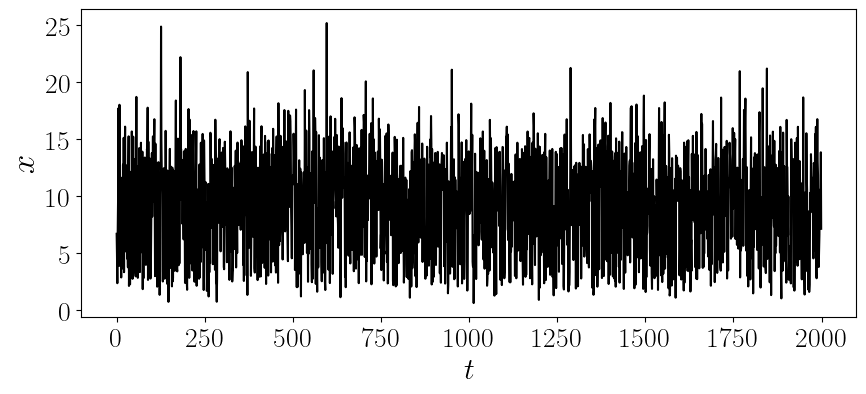

In [4]:
fig = plt.figure(figsize=(10,4),facecolor='white')
plt.plot(X,'k-')
plt.ylabel(r'$x$',size=25)
plt.xlabel(r'$t$',size=22)
plt.yticks(size=20)
plt.xticks(size=20)
plt.show()

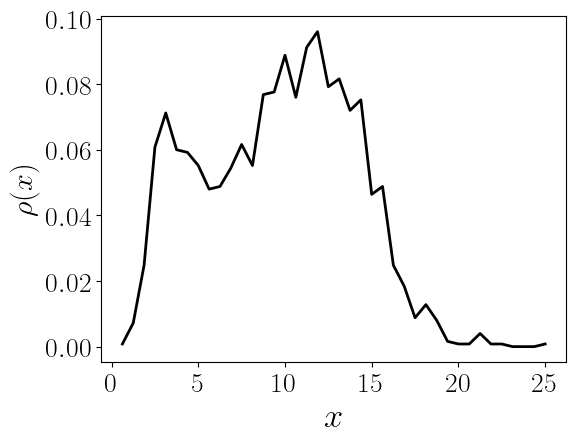

In [41]:
binL=np.linspace(0,25,41)
fig = plt.figure(figsize=(6,4.5),facecolor='white')
counts,base=np.histogram(X,bins=binL,density=True)
plt.plot(base[1::],counts,'k-',linewidth=2)
plt.xlabel(r'$x$',size=25)
plt.ylabel(r'$\rho(x)$',size=22)
plt.yticks(size=20)
plt.xticks(size=20)
#plt.savefig("Plot.png",bbox_inches="tight")
plt.show()

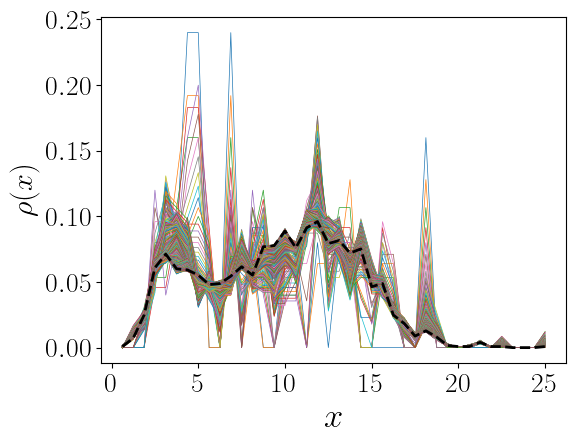

In [53]:

# Create a new figure for the plot with specified size and background color
fig = plt.figure(figsize=(6,4.5),facecolor='white')

# Loop over the range of values in X with a step size of 5
for ss in range(20,len(X),5):# ss empieza en el 20 hasta lenx -1 con pasos de 5
    # Calculate the histogram of the subset of X
    counts,base=np.histogram(X[0:ss],bins=binL,density=True)#influye la organización de X
    # Plot the histogram
    plt.plot(base[1::],counts,'-',linewidth=0.5)

# Calculate the histogram of the entire X
counts,base=np.histogram(X,bins=binL,density=True)
# Plot the histogram as a dashed line
plt.plot(base[1::],counts,'k--',linewidth=2)

# Set the label for the x-axis
plt.xlabel(r'$x$',size=25)
# Set the label for the y-axis
plt.ylabel(r'$\rho(x)$',size=22)

# Set the font size of the tick labels on the y-axis
plt.yticks(size=20)
# Set the font size of the tick labels on the x-axis
plt.xticks(size=20)

# Save the plot as a PNG file
plt.savefig("Plot.png",bbox_inches="tight")

# Display the plot
plt.show()

In [11]:
def D_KL(prob_P,prob_Q,binsize):
    out = 0
    for i in range(len(prob_P)):
        if prob_P[i] != 0 and prob_Q[i] != 0:
                out += prob_P[i] * (np.log(prob_P[i]) - np.log(prob_Q[i]))
    return out*binsize

In [12]:
#verificacion
binsize=(base[1]-base[0])
sum(counts)*binsize

1.0000000000000004

In [13]:
def D_JS(prob_P,prob_Q,binsize):
    prob_M=0.5*(prob_P+prob_Q)
    dist=0.5*(D_KL(prob_P,prob_M,binsize)+D_KL(prob_Q,prob_M,binsize))
    return dist

Encontranda la dicvergencia de shannon

In [54]:
# Initialize empty lists to store values
D_JSlist=[]
N_list=[]

# Calculate the histogram of the entire X
counts_total,base_total=np.histogram(X,bins=binL,density=True)

# Calculate the size of each bin
binsize=(base_total[1]-base_total[0])

# Print the sum of counts_total multiplied by binsize
print(sum(counts_total)*binsize)

#Aca ESTA EL CALCULO DE LA DIVERGENCIA DE JENSEN-SHANNON
# Loop over a range of values in X
for ss in range(5,len(X),1):
    # Calculate the histogram of the subset of X
    counts,base=np.histogram(X[0:ss],bins=binL,density=True)
    
    # Calculate the Jensen-Shannon divergence between counts_total and counts
    D_JSlist.append(D_JS(counts_total,counts,binsize))
    
    # Append the value of ss to N_list
    N_list.append(ss)

1.0000000000000004


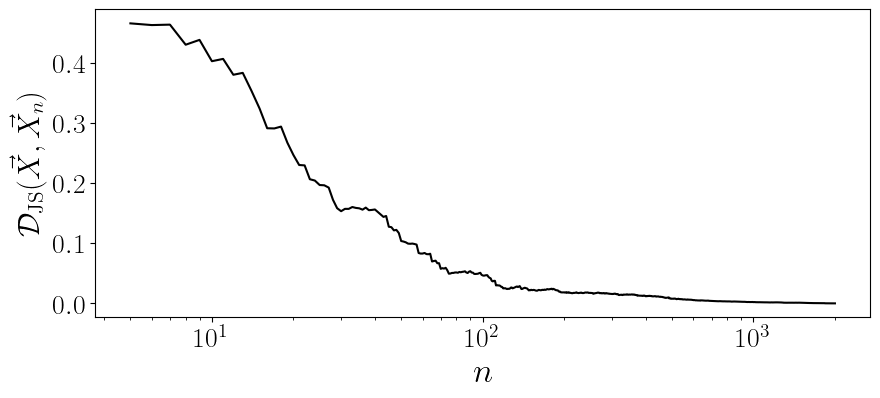

In [55]:
fig = plt.figure(figsize=(10,4),facecolor='white')
plt.semilogx(N_list,D_JSlist,'k-')
plt.xlabel(r'$n$',size=25)
plt.ylabel(r'$\mathcal{D}_{\mathrm{JS}}(\vec{X},\vec{X}_n)$',size=22)
plt.yticks(size=20)
plt.xticks(size=20)
plt.show()

Otra 

In [56]:

# Initialize an empty list to store the Jensen-Shannon divergences
D_JSlist_delta = []

# Initialize an empty list to store the sizes of the data subsets
N_list = []

# Print the total count of all elements in counts_total multiplied by binsize
print(sum(counts_total)*binsize)

# Iterate over a range of numbers from 5 to len(X)-1 in steps of 1
for ss in range(5, len(X) - 1, 1):
    # Calculate a histogram for the first ss elements of X
    counts1, base1 = np.histogram(X[0:ss], bins=binL, density=True)
    
    # Calculate a histogram for the first ss+1 elements of X
    counts2, base2 = np.histogram(X[0:ss+1], bins=binL, density=True)
    
    # Calculate the Jensen-Shannon divergence between counts1 and counts2
    # and append the result to the D_JSlist_delta list
    D_JSlist_delta.append(D_JS(counts1, counts2, binsize))
    
    # Append the current number ss to the N_list
    N_list.append(ss)

1.0000000000000004


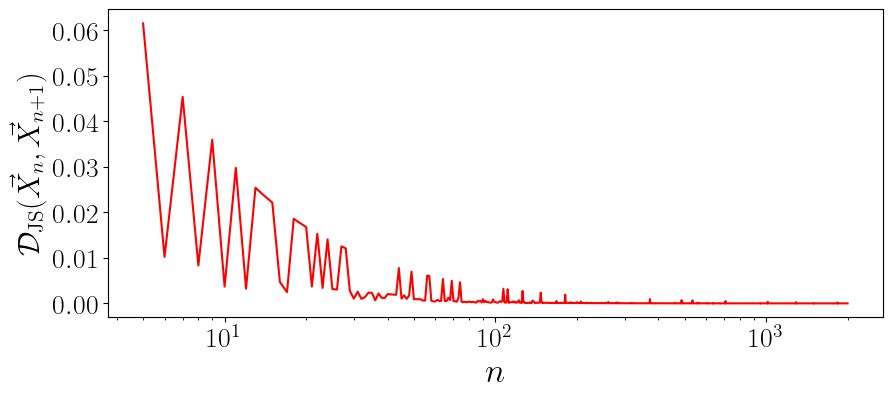

In [58]:
fig = plt.figure(figsize=(10,4),facecolor='white')
plt.semilogx(N_list,D_JSlist_delta,'r-')
plt.xlabel(r'$n$',size=25)
plt.ylabel(r'$\mathcal{D}_{\mathrm{JS}}(\vec{X}_n,\vec{X}_{n+1})$',size=22)
plt.yticks(size=20)
plt.xticks(size=20)
plt.show()